In [1]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

## Creando las funciones de indetificacion de comida

In [3]:
stopwords =  stopwords.words('spanish')

In [2]:
re_patron = re.compile(r'[#]\w+')

In [4]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [5]:
datos = pd.read_csv("ig_scrapper/database/uni data/data_finito.csv")
data = datos.copy(deep=True)
data.drop( data.columns[data.columns.str.contains('unnamed', case = False )], axis = 1, inplace = True )
data

,timestamp,user name,user url,img url,content,telefono,price
0,18 de agosto de 2020,clubhouseexpress,/clubhouseexpress/,https://scontent-mia3-2.cdninstagram.com/v/t51...,['Empezamos la semana de la mejor manera y que...,0424-437.0329,[]
1,18 de agosto de 2020,clubhouseexpress,/clubhouseexpress/,https://scontent-mia3-1.cdninstagram.com/v/t51...,No puedes dejar de probar el único Club House ...,0424-437.0329,[]
2,18 de agosto de 2020,clubhouseexpress,/clubhouseexpress/,https://scontent-mia3-2.cdninstagram.com/v/t51...,🌴Club House Los Roques🌴\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...,0424-437.0329,[]
3,18 de agosto de 2020,clubhouseexpress,/clubhouseexpress/,https://scontent-mia3-2.cdninstagram.com/v/t51...,⛰️ Bandeja Caracas ⛰️ \n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...,0424-437.0329,[]
4,18 de agosto de 2020,clubhouseexpress,/clubhouseexpress/,https://scontent-mia3-1.cdninstagram.com/v/t51...,NaN,0424-437.0329,NaN
...,...,...,...,...,...,...,...
530,28 de agosto de 2020,fratellos.vzla,/fratellos.vzla/,https://scontent-mia3-2.cdninstagram.com/v/t51...,NaN,"['0424 4369291', '0424 4273837']",NaN
531,28 de agosto de 2020,telepizza041,/telepizza041/,https://scontent-mia3-1.cdninstagram.com/v/t51...,['#pizza #foodvalencia #pizzavalencia #Telepiz...,0414-420.55.99,[]
532,28 de agosto de 2020,telepizza041,/telepizza041/,https://scontent-mia3-2.cdninstagram.com/v/t51...,¡La felicidad viene en una caja cuadrada y en ...,0414-420.55.99,[]
533,28 de agosto de 2020,escueladeparrilleros,/escueladeparrilleros/,https://scontent-mia3-1.cdninstagram.com/v/t51...,['¡Allá nos vemos!.Reposted from @delimarketva...,0424-4192918,"['$10', '$7']"


In [6]:
def part_content(content):

    hastag = re_patron.findall( content )
    hastag = [i.replace('#','').lower() for i in hastag]
    

    tokens =  nltk.regexp_tokenize( content, pattern )
    tokens = [i.lower() for i in tokens if len(i)>1]
 
    temp = hastag + stopwords
    for i in temp:
        if i in tokens: tokens.remove(i)
    
    bigrama_list = list(nltk.bigrams(tokens))
    bigramas = [i[0] + ' ' + i[1] for i in bigrama_list]

    return tokens, hastag, bigramas

In [7]:
tokens, hastag, bigramas = part_content(data['content'][103])

In [8]:
tokens

[&#39;arroz&#39;,
 &#39;chino&#39;,
 &#39;estilo&#39;,
 &#39;gusto&#39;,
 &#39;gourmet&#39;,
 &#39;disfruta&#39;,
 &#39;ricos&#39;,
 &#39;combos&#39;,
 &#39;elaborados&#39;,
 &#39;mejores&#39;,
 &#39;ingredientes&#39;]

In [9]:
bigramas

[&#39;arroz chino&#39;,
 &#39;chino estilo&#39;,
 &#39;estilo gusto&#39;,
 &#39;gusto gourmet&#39;,
 &#39;gourmet disfruta&#39;,
 &#39;disfruta ricos&#39;,
 &#39;ricos combos&#39;,
 &#39;combos elaborados&#39;,
 &#39;elaborados mejores&#39;,
 &#39;mejores ingredientes&#39;]

In [10]:
hastag

[&#39;gustogourmetburguer&#39;, &#39;arrozchinovalencia&#39;, &#39;valenciagourmet&#39;]

In [25]:
bigramas[0].lower()

&#39;arrozchino&#39;

In [12]:
total_tokens = tokens + bigramas
total_tokens

[&#39;arroz&#39;,
 &#39;chino&#39;,
 &#39;estilo&#39;,
 &#39;gusto&#39;,
 &#39;gourmet&#39;,
 &#39;disfruta&#39;,
 &#39;ricos&#39;,
 &#39;combos&#39;,
 &#39;elaborados&#39;,
 &#39;mejores&#39;,
 &#39;ingredientes&#39;,
 &#39;arroz chino&#39;,
 &#39;chino estilo&#39;,
 &#39;estilo gusto&#39;,
 &#39;gusto gourmet&#39;,
 &#39;gourmet disfruta&#39;,
 &#39;disfruta ricos&#39;,
 &#39;ricos combos&#39;,
 &#39;combos elaborados&#39;,
 &#39;elaborados mejores&#39;,
 &#39;mejores ingredientes&#39;]

In [13]:
freq = nltk.FreqDist(total_tokens)

In [38]:
freq.most_common(2)

[(&#39;arroz&#39;, 1), (&#39;chino&#39;, 1)]

In [14]:
freq_dict = dict(freq)

In [15]:
freq_dict

{&#39;arroz&#39;: 1,
 &#39;chino&#39;: 1,
 &#39;estilo&#39;: 1,
 &#39;gusto&#39;: 1,
 &#39;gourmet&#39;: 1,
 &#39;disfruta&#39;: 1,
 &#39;ricos&#39;: 1,
 &#39;combos&#39;: 1,
 &#39;elaborados&#39;: 1,
 &#39;mejores&#39;: 1,
 &#39;ingredientes&#39;: 1,
 &#39;arroz chino&#39;: 1,
 &#39;chino estilo&#39;: 1,
 &#39;estilo gusto&#39;: 1,
 &#39;gusto gourmet&#39;: 1,
 &#39;gourmet disfruta&#39;: 1,
 &#39;disfruta ricos&#39;: 1,
 &#39;ricos combos&#39;: 1,
 &#39;combos elaborados&#39;: 1,
 &#39;elaborados mejores&#39;: 1,
 &#39;mejores ingredientes&#39;: 1}

In [16]:
from difflib import SequenceMatcher as sm

def similar(a, b):
       return sm(None, a, b).ratio()

In [17]:
similar('arroz chino','arrozchinovalencia')

0.6896551724137931

In [107]:
prueba = list(freq_dict)

In [108]:
len(prueba)

24

In [18]:
def benford(c): 
    return np.log( 1 + (1/c))

In [127]:
benford(0.041666666666666664)

1.3979400086720377

0.041666666666666664

In [134]:
log_10 = [benford( (i+1)/24 ) for i in range(24)]

In [136]:
log = [benford( (i+1)/24 ) for i in range(24)]

[&lt;matplotlib.lines.Line2D at 0x15299417c18&gt;]

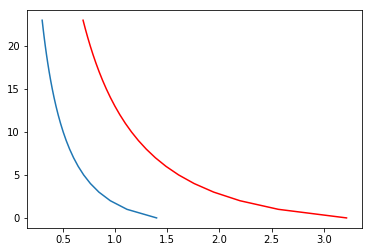

In [141]:
ig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(log_10, range(24))
ax.plot(log, range(24),color= 'r')

### COnstruccion de los enlaces

In [20]:
temp = total_tokens + bigramas

for i in hastag:
    for a in temp:
        freq_dict[a] += similar(a,i)


In [21]:
temp

[&#39;arroz&#39;,
 &#39;chino&#39;,
 &#39;estilo&#39;,
 &#39;gusto&#39;,
 &#39;gourmet&#39;,
 &#39;disfruta&#39;,
 &#39;ricos&#39;,
 &#39;combos&#39;,
 &#39;elaborados&#39;,
 &#39;mejores&#39;,
 &#39;ingredientes&#39;,
 &#39;arroz chino&#39;,
 &#39;chino estilo&#39;,
 &#39;estilo gusto&#39;,
 &#39;gusto gourmet&#39;,
 &#39;gourmet disfruta&#39;,
 &#39;disfruta ricos&#39;,
 &#39;ricos combos&#39;,
 &#39;combos elaborados&#39;,
 &#39;elaborados mejores&#39;,
 &#39;mejores ingredientes&#39;,
 &#39;arroz chino&#39;,
 &#39;chino estilo&#39;,
 &#39;estilo gusto&#39;,
 &#39;gusto gourmet&#39;,
 &#39;gourmet disfruta&#39;,
 &#39;disfruta ricos&#39;,
 &#39;ricos combos&#39;,
 &#39;combos elaborados&#39;,
 &#39;elaborados mejores&#39;,
 &#39;mejores ingredientes&#39;]

In [157]:
bigramas

[&#39;Arroz chino&#39;,
 &#39;chino estilo&#39;,
 &#39;estilo Gusto&#39;,
 &#39;Gusto Gourmet&#39;,
 &#39;Gourmet disfruta&#39;,
 &#39;disfruta ricos&#39;,
 &#39;ricos combos&#39;,
 &#39;combos elaborados&#39;,
 &#39;elaborados mejores&#39;,
 &#39;mejores ingredientes&#39;]

In [22]:
freq_dict

{&#39;arroz&#39;: 1.8014492753623188,
 &#39;chino&#39;: 1.8181159420289854,
 &#39;estilo&#39;: 1.5971428571428572,
 &#39;gusto&#39;: 1.8036231884057972,
 &#39;gourmet&#39;: 2.3348251748251747,
 &#39;disfruta&#39;: 1.6369379412857674,
 &#39;ricos&#39;: 1.4442028985507247,
 &#39;combos&#39;: 1.6923809523809523,
 &#39;elaborados&#39;: 1.6697536945812808,
 &#39;mejores&#39;: 1.5695104895104897,
 &#39;ingredientes&#39;: 1.746953405017921,
 &#39;arroz chino&#39;: 2.9536693191865604,
 &#39;chino estilo&#39;: 3.0611708482676225,
 &#39;estilo gusto&#39;: 2.2081242532855434,
 &#39;gusto gourmet&#39;: 3.887096774193548,
 &#39;gourmet disfruta&#39;: 3.402385470317159,
 &#39;disfruta ricos&#39;: 2.2736415882967607,
 &#39;ricos combos&#39;: 2.0833930704898447,
 &#39;combos elaborados&#39;: 2.5126984126984127,
 &#39;elaborados mejores&#39;: 2.5981435981435985,
 &#39;mejores ingredientes&#39;: 2.3819934451513394}

In [33]:
def benford_preference(a):

    for i in range(len(a)):
        
        c = (i + 1)/len(a)
        
        freq_dict[ a[i] ] *=  benford(c)


In [36]:
freq_dict

{&#39;arroz&#39;: 4.4764332836036,
 &#39;chino&#39;: 3.403153378149342,
 &#39;estilo&#39;: 2.4603107939698754,
 &#39;gusto&#39;: 2.3839494824028935,
 &#39;gourmet&#39;: 2.7157537928525923,
 &#39;disfruta&#39;: 1.7047953618052956,
 &#39;ricos&#39;: 1.363994193057838,
 &#39;combos&#39;: 1.463905187060663,
 &#39;elaborados&#39;: 1.333311175911211,
 &#39;mejores&#39;: 1.164478445112318,
 &#39;ingredientes&#39;: 1.2108958272577681,
 &#39;arroz chino&#39;: 7.082589697887035,
 &#39;chino estilo&#39;: 5.48488185430839,
 &#39;estilo gusto&#39;: 3.2378544450943987,
 &#39;gusto gourmet&#39;: 4.8696108936674785,
 &#39;gourmet disfruta&#39;: 3.7379024884762573,
 &#39;disfruta ricos&#39;: 2.2300541806655065,
 &#39;ricos combos&#39;: 1.8486013278883806,
 &#39;combos elaborados&#39;: 2.03762306709595,
 &#39;elaborados mejores&#39;: 1.9413703145558874,
 &#39;mejores ingredientes&#39;: 1.6510720406189217}

In [35]:
benford_preference(bigramas)

In [28]:
tokens

[&#39;arroz&#39;,
 &#39;chino&#39;,
 &#39;estilo&#39;,
 &#39;gusto&#39;,
 &#39;gourmet&#39;,
 &#39;disfruta&#39;,
 &#39;ricos&#39;,
 &#39;combos&#39;,
 &#39;elaborados&#39;,
 &#39;mejores&#39;,
 &#39;ingredientes&#39;]

In [51]:
sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

[(&#39;arroz chino&#39;, 7.082589697887035),
 (&#39;chino estilo&#39;, 5.48488185430839),
 (&#39;gusto gourmet&#39;, 4.8696108936674785),
 (&#39;arroz&#39;, 4.4764332836036),
 (&#39;gourmet disfruta&#39;, 3.7379024884762573),
 (&#39;chino&#39;, 3.403153378149342),
 (&#39;estilo gusto&#39;, 3.2378544450943987),
 (&#39;gourmet&#39;, 2.7157537928525923),
 (&#39;estilo&#39;, 2.4603107939698754),
 (&#39;gusto&#39;, 2.3839494824028935),
 (&#39;disfruta ricos&#39;, 2.2300541806655065),
 (&#39;combos elaborados&#39;, 2.03762306709595),
 (&#39;elaborados mejores&#39;, 1.9413703145558874),
 (&#39;ricos combos&#39;, 1.8486013278883806),
 (&#39;disfruta&#39;, 1.7047953618052956),
 (&#39;mejores ingredientes&#39;, 1.6510720406189217),
 (&#39;combos&#39;, 1.463905187060663),
 (&#39;ricos&#39;, 1.363994193057838),
 (&#39;elaborados&#39;, 1.333311175911211),
 (&#39;ingredientes&#39;, 1.2108958272577681),
 (&#39;mejores&#39;, 1.164478445112318)]

In [53]:
max(freq_dict, key=freq_dict.get )

&#39;arroz chino&#39;

# Funcion para obtener el nombre del plato

In [ ]:
def name_plate(content_list):

    # Main Func to find "plate's names"

    for i in content_list:

        tokens, hastag, bigramas = part_content( i )

        